# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [5]:
import xlwings as xw
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt


In [6]:
# 1
reviews = pd.read_csv("reviews_sample.csv")
reviews.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
recipes = pd.read_csv("recipes_sample.csv",
                      usecols=["id", "name", "minutes", "submitted", "description", "n_ingredients"])


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [7]:
# 2
wb = xw.Book('recipes.xlsx')
sht1 = wb.sheets.add("Отзывы")
sht = wb.sheets.add("Рецепты")
wb.sheets['Лист1'].delete()
sht.range('A1').value = recipes.sample(n=int(recipes.shape[0] * 0.05))
sht1.range('A1').value = reviews.sample(n=int(reviews.shape[0] * 0.05))


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [8]:
# 3
xw.Range('H1').value = 'seconds_assign'
xw.Range("H2").options(transpose=True).value = sht.range('D2:D1501').options(np.array).value * 60


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [9]:
# 4
xw.Range('I1').value = 'seconds_formula'
formula = xw.Range('I2').formula = f'=D2*60'
xw.Range("I2:I1501").formula = formula


5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [10]:
# 5
sht.range('H1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
sht.range('I1').api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
sht.range('H1').api.Font.Bold = True
sht.range('I1').api.Font.Bold = True


6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [11]:
# 6
for cell in sht["D2:D1501"]:
    if cell.value > 10:
        cell.color = (255, 0, 0)
    elif 5 <= cell.value <= 10:
        cell.color = (255, 223, 0)
    elif cell.value < 5:
        cell.color = (0, 214, 120)


7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [12]:
# 7
sht.range('J1').value = 'n_reviews'
formula_for_7 = sht.range('J2').formula = f'=COUNTIF(Отзывы!$D$2:$D$6335,C2)'
sht.range('J2:J1501').value = formula_for_7


## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [13]:
# 8
rating = sht1["F2:F6335"].value
recipe_id = sht1["D2:D6335"].value
id_res = sht["B2:B1501"].value


def validate():
    for i in range(len(rating)):
        if not (0 <= rating[i] <= 5) or (recipe_id[i] not in id_res):
            sht1[f"A{i + 2}:G{i + 2}"].color = (255, 0, 0)


validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [14]:
# 9
wb_r_m = xw.Book("recipes_model.csv")
sht2 = wb_r_m.sheets.add(name="Модель")
wb_r_m.sheets[1].delete()

with open("recipes_model.csv", "r", encoding="utf-8") as file:
    df_for_9 = pd.DataFrame(csv.reader(file, delimiter='\t'))

sht2.range('A2').options(index=False, header=False).value = df_for_9


10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [15]:
# 10
formula_for_10 = xw.Range(
    'J2').formula = f'=CONCAT(B2, " ", UPPER(C2), " ", IFS(G2="PK", "PRIMARY KEY", G2="FK",CONCAT("REFERENCES", " (", H2, " ", I2, ")" ),ISBLANK(G2),""), IF(AND(D2="Y",G2<>"PK"), " NOT NULL", ""))'
xw.Range(f"J2:J18").formula = formula_for_10

![изображение.png](attachment:302ecb20-9c0c-4c99-8d33-a0d070a89b6d.png)

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [16]:
# 11
sht2["A1:J1"].color = "00ccff"
sht2.autofit(axis="columns")
sht2.range('A1:J1').api.Font.Bold = True
sht2.range('A1:J1').api.AutoFilter(Field := 1)

True

![изображение.png](attachment:c09cb1a2-5194-49ad-8c68-91534d551543.png)

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot)

In [17]:
sht3 = wb_r_m.sheets.add(name="Статистика")
dct = {}

var = list(set([i for i in sht2["$A$2:$A$18"].value]))
sht3.range("A1:A3").options(transpose=True).value = list(var)

for i in range(1, len(var) + 1):
    xw.Range(f"B{i}").formula = f'=COUNTIF(МОДЕЛЬ!$A$2:$A$18, A{i})'
    dct[var[i - 1]] = [sht3[f"B{i}"].value]

df_for_12 = pd.DataFrame.from_dict(dct)

<Picture 'MyPlot' in <Sheet [recipes_model.csv]Статистика>>

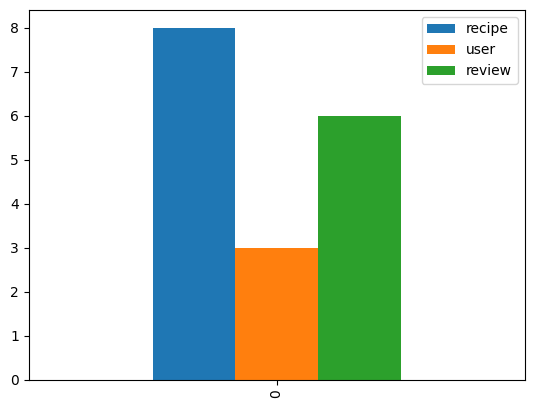

In [18]:
%matplotlib inline
plot = df_for_12.plot(kind="bar")
plt.savefig(r'saved_figure.png')
sht3.pictures.add(image=r"C:\Users\Aldar\PycharmProjects\pythonProject\что я накалякал 2 курс\saved_figure.png", name='MyPlot',
                  left=sht3.range("E2").left, update=True)

![изображение.png](attachment:1bf18bec-0647-46f8-9ab7-c75eae9c1afa.png)